In [35]:
from annotation_utils import get_union, plot_annotations, tp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import umap

sns.set(rc = {'figure.figsize':(8,5)})
sns.set_style("white", {'font.family':'serif', 'font.serif':'Times Roman'})
sns.set_context("talk")
sns.set_palette("crest")

In [20]:
# Compiled annotations pickle file, generated from compile_annotations.py script
ANNOTATIONS_FILEPATH = '../audio_annotation/compiled_annotations_df.pkl'
EPISODE_ID = '6hoNS9LR1Lxb4EzMX72kXR'

# From Box, yamnet/embedding folder:
YAM_FILEPATH = f'{EPISODE_ID}.h5'

In [21]:
annotator_colors = {
    'connor': 'orange',
    'jiahui': 'blue',
    'morris': 'red',
    'max': 'purple',
    'union': 'black'
}

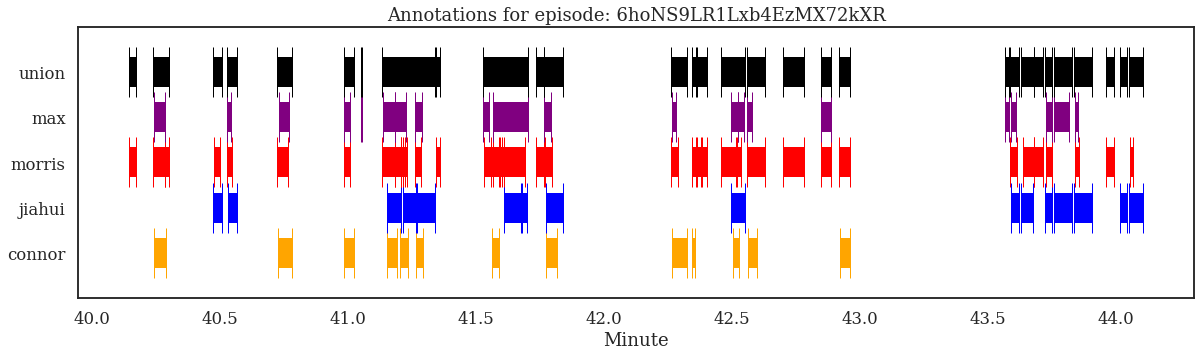

In [22]:
annot_df = pd.read_pickle(ANNOTATIONS_FILEPATH)
union_ranges = get_union(annot_df, EPISODE_ID)
union_df = pd.DataFrame([['union', EPISODE_ID, 'DISAGREE', i.start, i.end] for i in union_ranges], 
                        columns = annot_df.columns)
combined_df = pd.concat([annot_df, union_df])
plot_annotations(combined_df, '6hoNS9LR1Lxb4EzMX72kXR', annotator_colors)

In [23]:
example_yembedding = pd.read_hdf(YAM_FILEPATH)
print(example_yembedding.shape)
#sliding windows of length 0.96 seconds and hop 0.48 seconds

(6147, 1024)


In [24]:
# 1 if disagreement
disagreement_labels = 1*np.array([any([t in r for r in union_ranges]) for t in example_yembedding.index])

# 1 if we annotated the time period (we looked at minute 40 onwards)
annotated_mask = 1*(example_yembedding.index > (60*40))

yam_labels = []
for i in range(len(disagreement_labels)):
    # listened to the clip, but didn't annotate as disagreement
    if (disagreement_labels[i]==0 and annotated_mask[i]==1):
        yam_labels.append(0)
    # didn't listen to the clip
    elif annotated_mask[i]==0:
        yam_labels.append(1)
    # listened and annotated as disagreement
    elif (disagreement_labels[i]==1 and annotated_mask[i]==1):
        yam_labels.append(2)

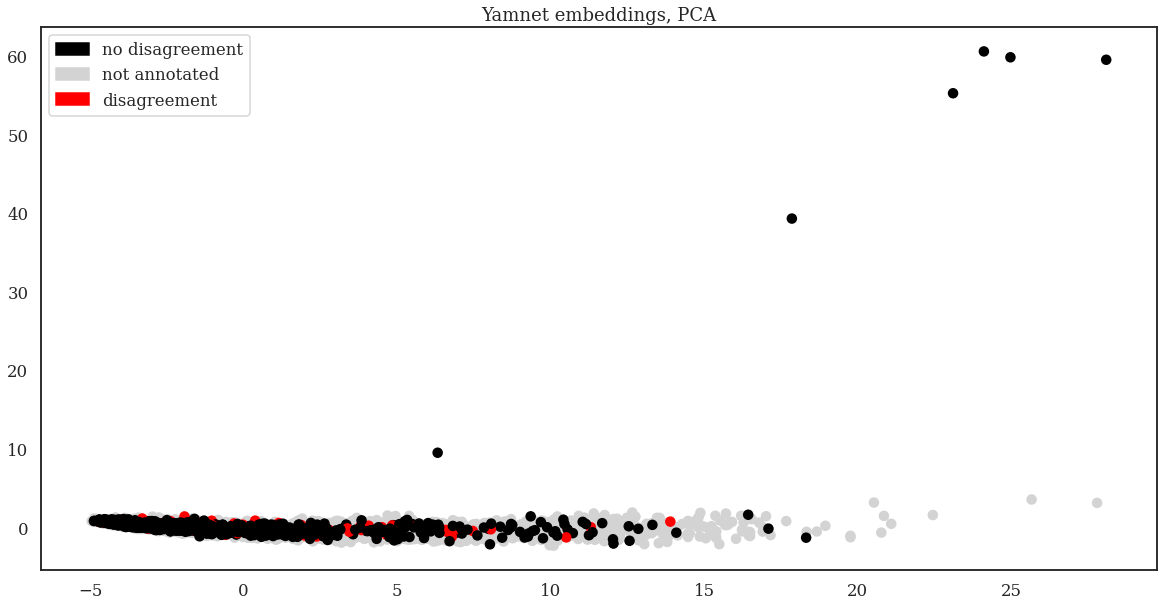

In [25]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

pca = PCA(n_components=2)
X = pca.fit_transform(example_yembedding)
plt.figure(figsize = (20,10))
plt.scatter(X[:,0], X[:,1], c = np.array(['black', 'lightgray', 'red'])[yam_labels])

black_patch = mpatches.Patch(color='black', label='no disagreement')
gray_patch = mpatches.Patch(color='lightgray', label='not annotated')
red_patch = mpatches.Patch(color='red', label='disagreement')
plt.legend(handles=[black_patch, gray_patch, red_patch])
plt.title('Yamnet embeddings, PCA');

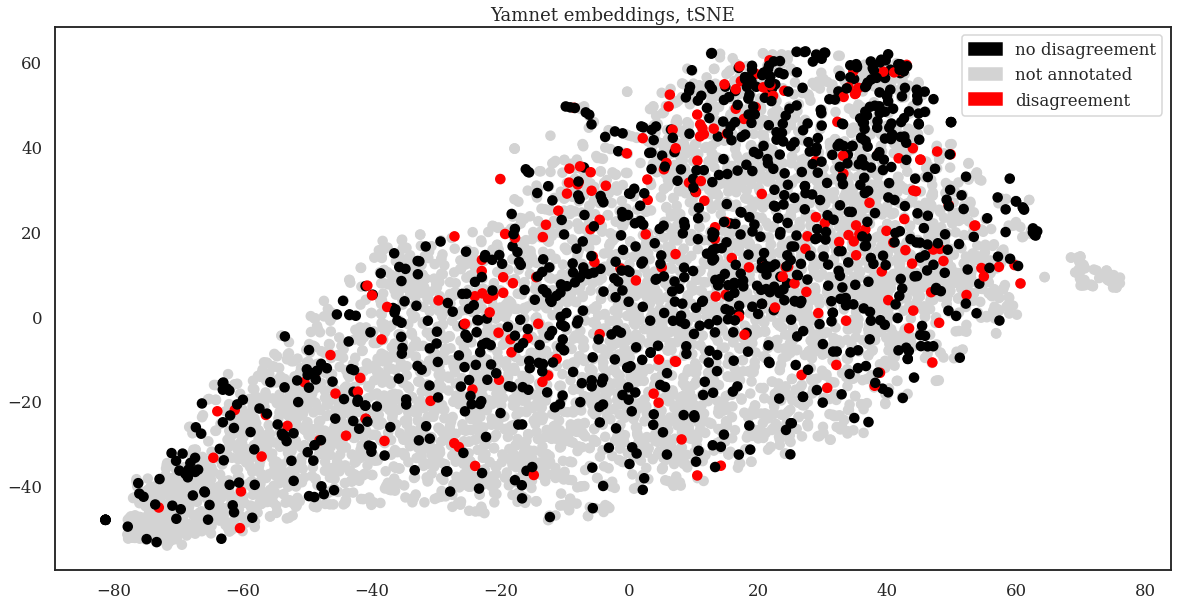

In [31]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state = 10,
                  init='random', perplexity = 30).fit_transform(example_yembedding)

plt.figure(figsize = (20,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = np.array(['black', 'lightgray', 'red'])[yam_labels])
black_patch = mpatches.Patch(color='black', label='no disagreement')
gray_patch = mpatches.Patch(color='lightgray', label='not annotated')
red_patch = mpatches.Patch(color='red', label='disagreement')
plt.legend(handles=[black_patch, gray_patch, red_patch])
plt.title('Yamnet embeddings, tSNE');

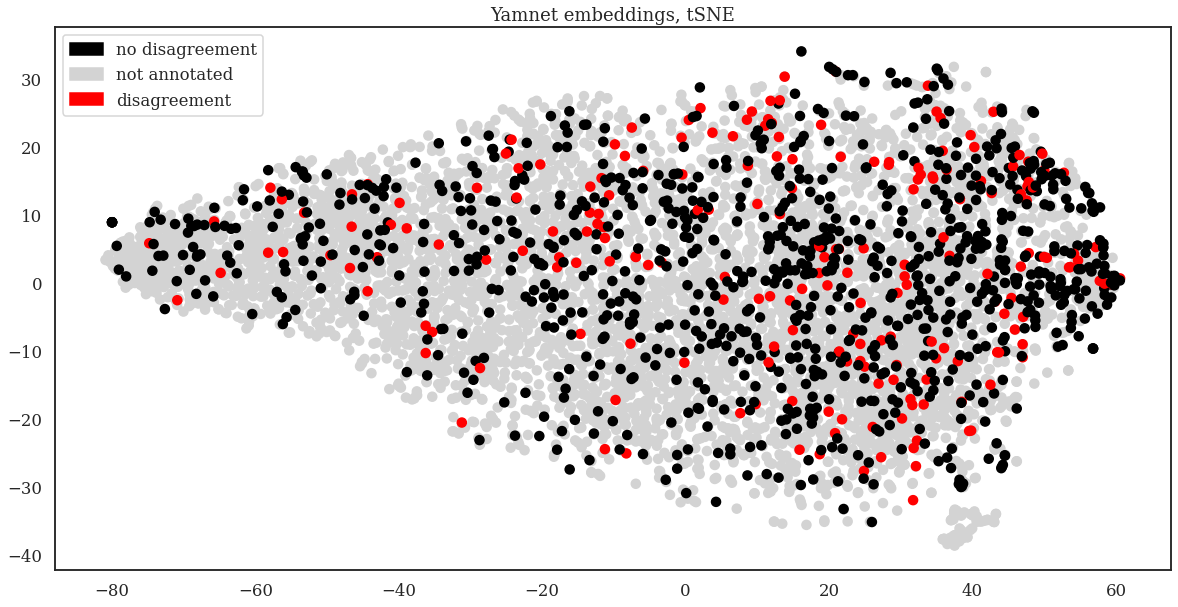

In [32]:
X_embedded = TSNE(n_components=2, random_state = 10,
                  init='random', perplexity = 50).fit_transform(example_yembedding)

plt.figure(figsize = (20,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = np.array(['black', 'lightgray', 'red'])[yam_labels])
black_patch = mpatches.Patch(color='black', label='no disagreement')
gray_patch = mpatches.Patch(color='lightgray', label='not annotated')
red_patch = mpatches.Patch(color='red', label='disagreement')
plt.legend(handles=[black_patch, gray_patch, red_patch])
plt.title('Yamnet embeddings, tSNE');

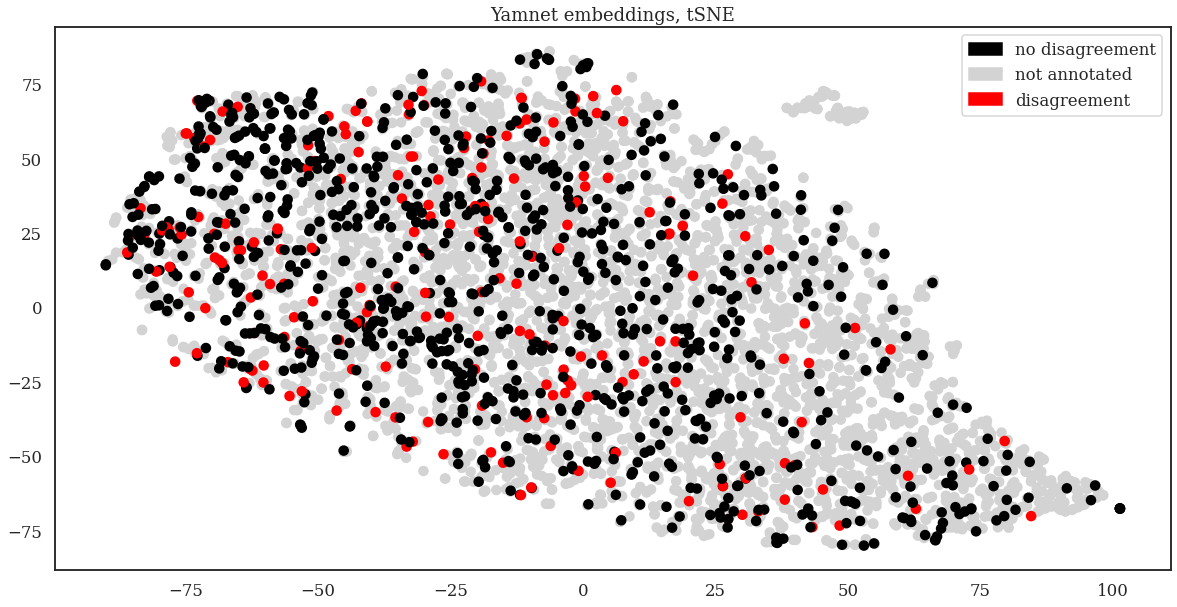

In [33]:
X_embedded = TSNE(n_components=2, random_state = 10,
                  init='random', perplexity = 10).fit_transform(example_yembedding)

plt.figure(figsize = (20,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = np.array(['black', 'lightgray', 'red'])[yam_labels])
black_patch = mpatches.Patch(color='black', label='no disagreement')
gray_patch = mpatches.Patch(color='lightgray', label='not annotated')
red_patch = mpatches.Patch(color='red', label='disagreement')
plt.legend(handles=[black_patch, gray_patch, red_patch])
plt.title('Yamnet embeddings, tSNE');

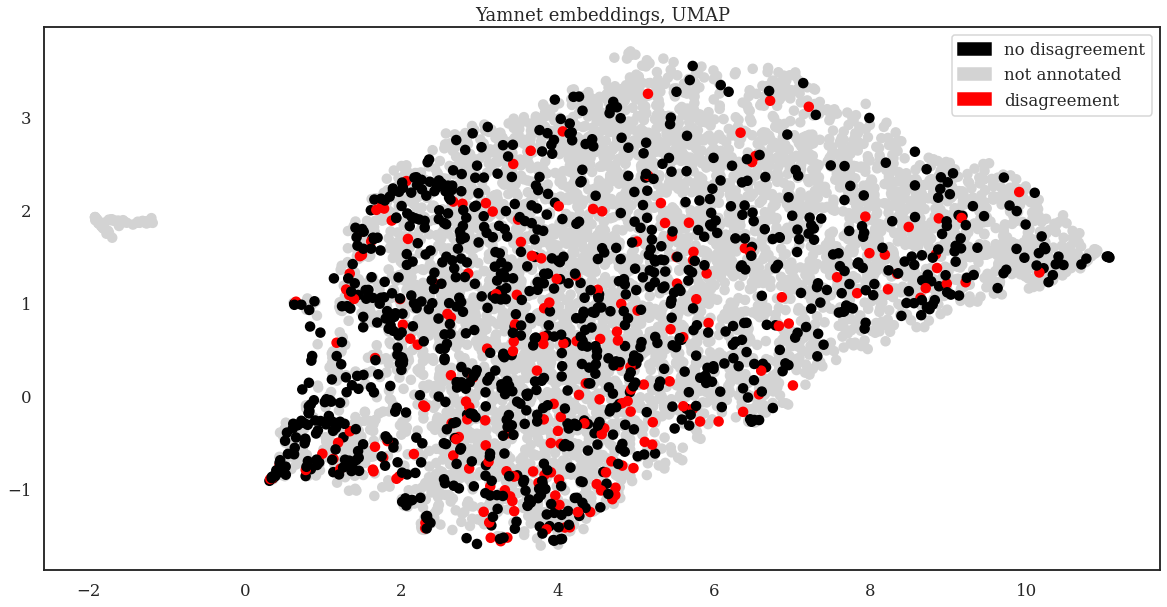

In [40]:
# UMAP projection

from sklearn.preprocessing import StandardScaler
X_embedded = umap.UMAP(random_state = 1).fit_transform(StandardScaler().fit_transform(example_yembedding))

plt.figure(figsize = (20,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = np.array(['black', 'lightgray', 'red'])[yam_labels])
black_patch = mpatches.Patch(color='black', label='no disagreement')
gray_patch = mpatches.Patch(color='lightgray', label='not annotated')
red_patch = mpatches.Patch(color='red', label='disagreement')
plt.legend(handles=[black_patch, gray_patch, red_patch])
plt.title('Yamnet embeddings, UMAP');